
Correlations with bat speed:
peak_eccentric_force_[n]_mean_pp                  0.745632
peak_takeoff_force_[n]_mean_pp                    0.635276
peak_takeoff_force_asymmetry_[%_l,r]_mean_pp      0.146829
peak_eccentric_force_asymmetry_[%_l,r]_mean_pp    0.025504
dtype: float64


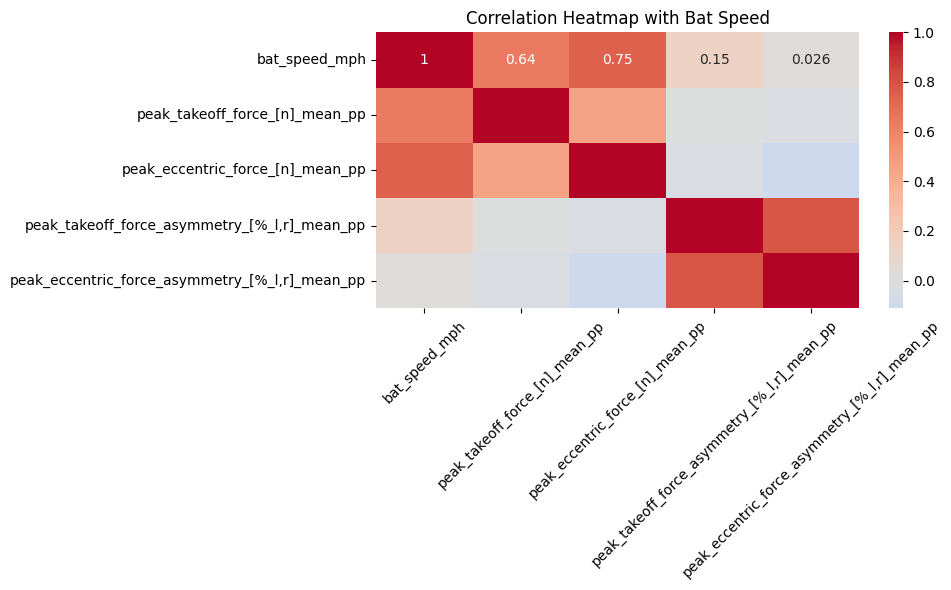

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/Users/brenthokeness/Desktop/OBPData/hp_obp.csv')

# List of Plyo Pushup columns to correlate with bat speed
pp_columns = [
    'peak_takeoff_force_[n]_mean_pp',
    'peak_eccentric_force_[n]_mean_pp',
    'peak_takeoff_force_asymmetry_[%_l,r]_mean_pp',
    'peak_eccentric_force_asymmetry_[%_l,r]_mean_pp'
]

# Calculate correlations
correlations = df[pp_columns].corrwith(df['bat_speed_mph'])

# Sort and display correlations
print("\nCorrelations with bat speed:")
print(correlations.sort_values(ascending=False))

# Create heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[['bat_speed_mph'] + pp_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap with Bat Speed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

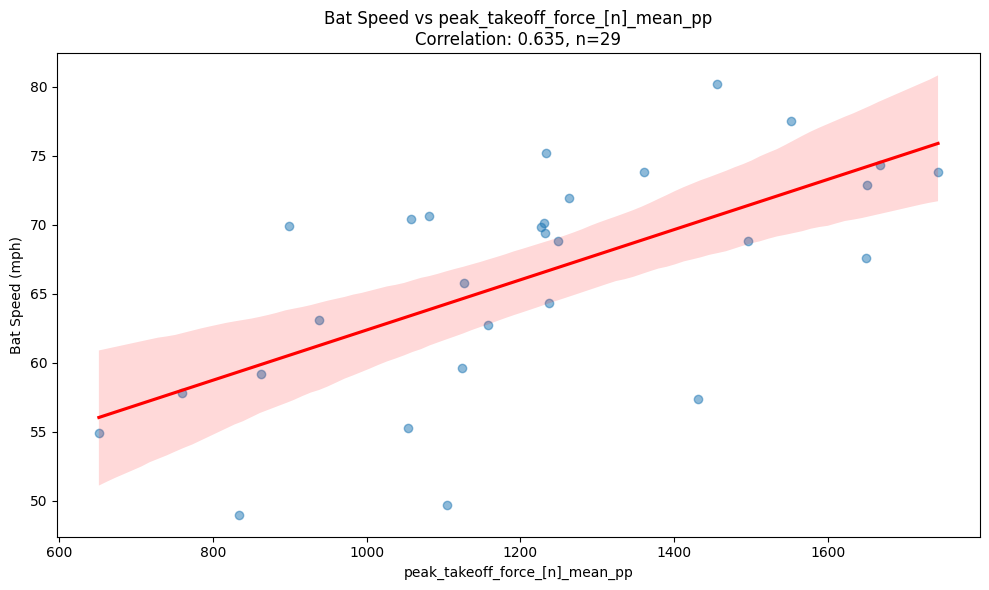

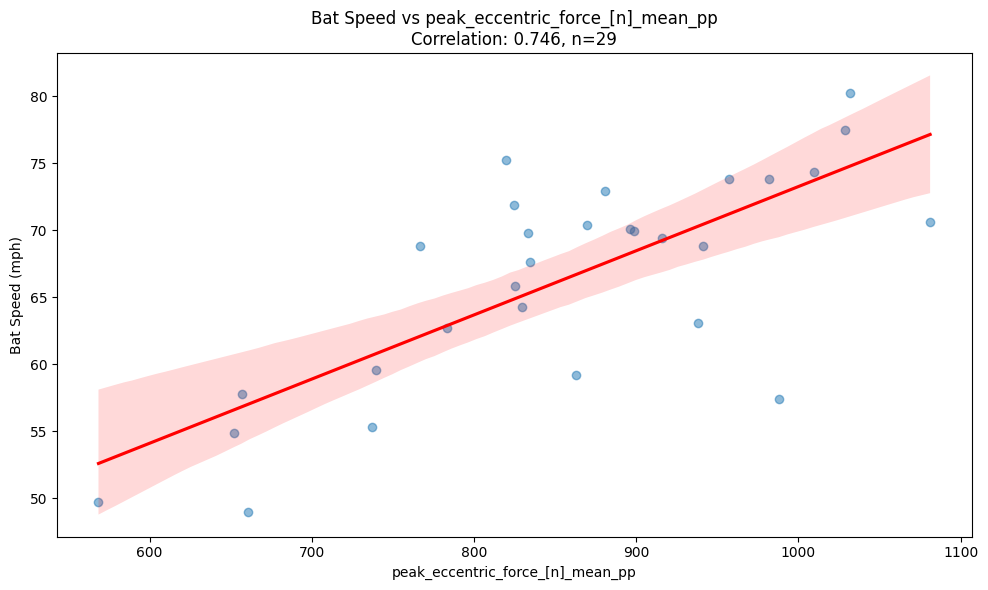

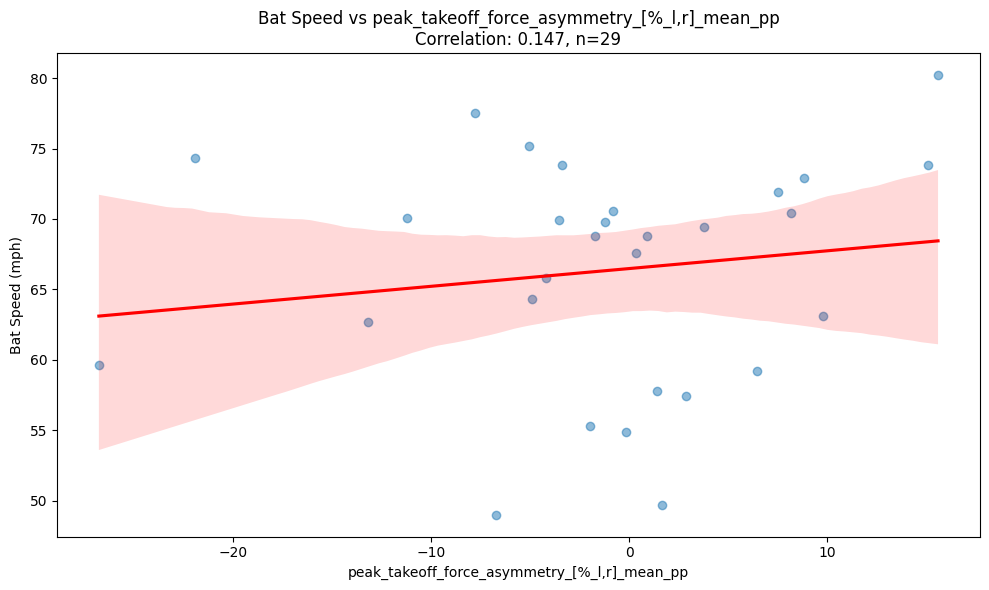

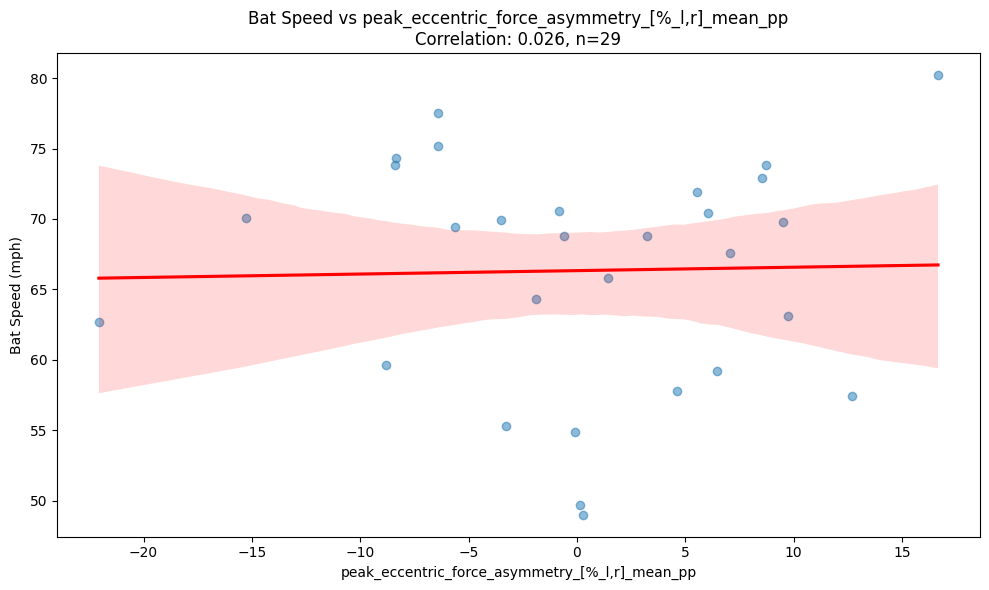

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read data
df = pd.read_csv('/Users/brenthokeness/Desktop/OBPData/hp_obp.csv')

# Plyo Pushup variables to plot
pp_vars = [
    'peak_takeoff_force_[n]_mean_pp',
    'peak_eccentric_force_[n]_mean_pp',
    'peak_takeoff_force_asymmetry_[%_l,r]_mean_pp',
    'peak_eccentric_force_asymmetry_[%_l,r]_mean_pp'
]

# Create individual plots
for var in pp_vars:
    plt.figure(figsize=(10, 6))
    
    # Calculate correlation coefficient and sample size
    valid_data = df[[var, 'bat_speed_mph']].dropna()
    n_size = len(valid_data)
    corr = valid_data[var].corr(valid_data['bat_speed_mph'])
    
    # Create scatter plot with regression line
    sns.regplot(
        data=valid_data,
        x=var,
        y='bat_speed_mph',
        scatter_kws={'alpha':0.5},
        line_kws={'color': 'red'}
    )
    
    # Add labels and title with correlation and sample size
    plt.xlabel(var)
    plt.ylabel('Bat Speed (mph)')
    plt.title(f'Bat Speed vs {var}\nCorrelation: {corr:.3f}, n={n_size}')
    
    plt.tight_layout()
    plt.show()

In [11]:
import pandas as pd
from scipy import stats
import numpy as np

# Read data
df = pd.read_csv('/Users/brenthokeness/Desktop/OBPData/hp_obp.csv')

# Plyo Pushup variables
pp_vars = [
    'peak_takeoff_force_[n]_mean_pp',
    'peak_eccentric_force_[n]_mean_pp',
    'peak_takeoff_force_asymmetry_[%_l,r]_mean_pp',
    'peak_eccentric_force_asymmetry_[%_l,r]_mean_pp'
]

# Calculate correlations and p-values
results = []
for var in pp_vars:
    # Get valid pairs
    valid_data = df[[var, 'bat_speed_mph']].dropna()
    n = len(valid_data)
    
    # Calculate correlation and p-value
    correlation, p_value = stats.pearsonr(valid_data[var], valid_data['bat_speed_mph'])
    
    # Store results
    results.append({
        'Variable': var,
        'Correlation': correlation,
        'P-value': p_value,
        'Sample Size': n,
        'Significance': '***' if p_value < 0.001 else 
                       '**' if p_value < 0.01 else 
                       '*' if p_value < 0.05 else 
                       'ns'
    })

# Create and display results DataFrame
results_df = pd.DataFrame(results)
print("\nCorrelation Analysis with Bat Speed:")
print(results_df.to_string(index=False))



Correlation Analysis with Bat Speed:
                                      Variable  Correlation  P-value  Sample Size Significance
                peak_takeoff_force_[n]_mean_pp     0.635276 0.000213           29          ***
              peak_eccentric_force_[n]_mean_pp     0.745632 0.000003           29          ***
  peak_takeoff_force_asymmetry_[%_l,r]_mean_pp     0.146829 0.447224           29           ns
peak_eccentric_force_asymmetry_[%_l,r]_mean_pp     0.025504 0.895519           29           ns
